# Linear Regression

<meta name="title" property="og:title" content="Linear Regression">
<meta name="image" property="og:image" content="./images/linear_reg1.png">
<meta name="author" content="Nishant Baheti">

linear regression, a very simple approach for supervised learning. In particular, linear regression is a useful tool for predicting a quantitative response. In statistics, linear regression is a linear approach to modelling the relationship between a scalar response and one or more explanatory variables (also known as dependent and independent variables). The case of one explanatory variable is called simple linear regression; for more than one, the process is called multiple linear regression.This term is distinct from multivariate linear regression, where multiple correlated dependent variables are predicted, rather than a single scalar variable.

- here theta/θ is used for estimator
- X - feature matrix (number_of_samples, number_of_features) (independent variable)
- y - target matrix (number_of_samples,) or (number_of_samples,1) (dependent variable)


Some formulas - 

- Hypothesis: $h_\theta(x)=\theta_0 + \theta_1.x$

- Parameters: $\theta_0, \theta_1$ 

- Cost Function: $J(\theta_0,\theta_1)=\frac{1}{2m}\sum_{i=1}^{m}({h_\theta{(x^{(i)}) - y^{(i)}}^2})$

- Goal: ${{minimize}\atop{\theta_0,\theta_1}} J(\theta_0,\theta_1)$

In [1]:
import pandas as pd 
import numpy as np
from sklearn.datasets import make_regression
import matplotlib.pyplot as plt 
from mpl_toolkits import mplot3d
import seaborn as sns

from matplotlib import animation
from IPython import display

## Generate Data

### for 2D

In [2]:
X1,y1 = make_regression(n_samples=300,n_features=1,noise=30)

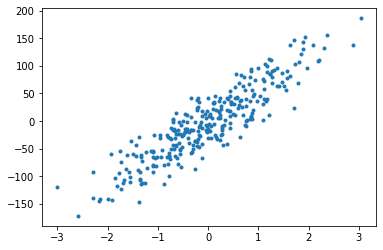

In [3]:
plt.plot(X1,y1,'.')

### for 3D

In [4]:
X2,y2 = make_regression(n_samples=300,n_features=2,noise=30)

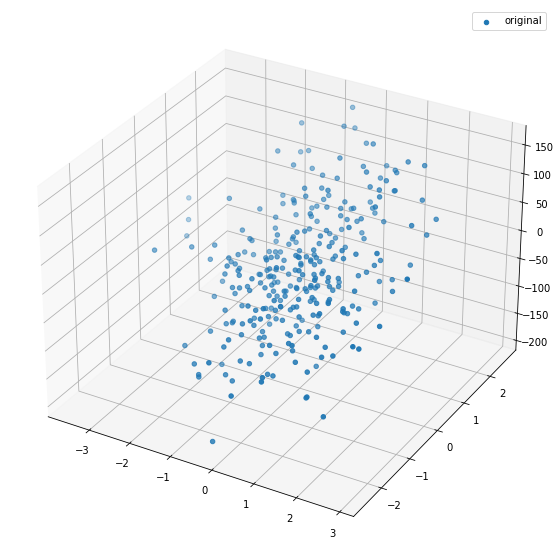

In [5]:
fig = plt.figure(figsize=(10,10))
ax = plt.axes(projection='3d')

ax.scatter(X2[...,0],X2[...,1],y2, cmap='viridis',label='original')

plt.legend()
plt.show()

- Shape of X
            
           X = (m,n)
           where 
               m = number of samples 
               n = number of features 


- choosing LSTAT for feature column X           
- setup $X_0$ (column 0 as 1) for linear regression $( θ_0 * X_0 + θ_1 * X_1  = θ_0 + θ_1 * X_1 )$

In [6]:
def add_axis_for_bias(X_i):
    
    X_i = X_i.copy()
    if len(X_i.shape) == 1:
        X_i = X_i.reshape(-1,1)

    if False in (X_i[...,0] == 1):        
        return np.hstack(tup=(np.ones(shape=(X_i.shape[0],1)) , X_i))
    else:
        return X_i

In [7]:
X = add_axis_for_bias(X1)
y = y1.reshape(-1,1)

print(X.shape, y.shape)

(300, 2) (300, 1)


In [8]:
n = X.shape[1]
m = y.shape[0]
print("number of columns (features) :",n)
print("number of samples (rows) :",m)

number of columns (features) : 2
number of samples (rows) : 300


## Check for bias column

In [9]:
arr = np.array([
    [1,2,3,4],
    [1,6,7,8],
    [1,11,12,13],
    [1,4,2,4],
    [1,5,2,1],
    [1,7,54,23]
])
arr.shape 

(6, 4)

- this means 3 rows and 4 columns (3 samples, 4 features)

In [10]:
np.sum(arr), np.sum(arr,axis=0), np.sum(arr,axis=1)

(174, array([ 6, 35, 80, 53]), array([10, 22, 37, 11,  9, 85]))

In [11]:
np.mean(arr), np.mean(arr,axis=0), np.mean(arr,axis=1)

(7.25,
 array([ 1.        ,  5.83333333, 13.33333333,  8.83333333]),
 array([ 2.5 ,  5.5 ,  9.25,  2.75,  2.25, 21.25]))

In [12]:
False not in (arr[...,0] == 1)

True

- for us calculation will be done column wise so axis = 0 everywhere

## Regression Error functions

### Mean Squared Error

In [13]:
def calculate_mse(y_pred,y):
    return np.square(y_pred - y).mean()

### Root Mean Squared Error

In [14]:
def calculate_rmse(y_pred,y):
    return np.sqrt(np.square(y_pred - y).mean())

### Mean Absolute Error

In [15]:
def calculate_mae(y_pred,y):
    return np.sqrt(np.square(y_pred - y).mean())

## Gradient Descent

m = number of training samples(number of rows)
X = input features(matrix)
y = output target(matrix)


                training-set
                    |
                    V
                Learning algorithm
                    |
                    V
        test --->   h  ---> estimation
                (hypothesis)
        
        
$h(x) = \theta_0 + \theta_1 . X$

Affine Function = linear function + a constant

### Cost Function

$J(\theta_0,\theta_1)=\frac{1}{2m}\sum_{i=1}^{m}({h_\theta{(x^{(i)}) - y^{(i)}}^2})$

In [16]:
def calculate_cost(y_pred,y):
    """
    Cost function
    
    .. math::
        J(\theta_0,\theta_1)=\frac{1}{2m}\sum_{i=1}^{m}({h_\theta{(x^{(i)}) - y^{(i)}}^2})
    
    Args:
        y_pred : predicted value h_\theta
        y : original target
    """
    return np.mean(np.square(y_pred - y)) / 2 

### Gradient Descent Alogrithm

repeat until convergence {\
$\theta_j := \theta_j - \alpha \frac{\partial}{\partial\theta_j}{J(\theta_0,\theta_1)}$ (for j=0 and j=1)\
}

simultaneous update

$temp_0 := \theta_0 - \alpha\frac{\partial}{\partial\theta_0}{J(\theta_0,\theta_1)}$

$temp_1 := \theta_1 - \alpha\frac{\partial}{\partial\theta_1}{J(\theta_0,\theta_1)}$

$\theta_0 := temp_0$

$\theta_1 := temp_1$






#### final algorithm


\begin{align}
    \text{repeat until convergence \{}\\
    \theta_0 &:= \theta_0 - \alpha \frac{1}{m}{\sum_{i=1}^{m}{(h_\theta(x^{(i)}) - y^{(i)})}}\\
    \theta_1 &:= \theta_1 - \alpha \frac{1}{m}{\sum_{i=1}^{m}{(h_\theta(x^{(i)}) - y^{(i)})}}.{x^{(i)}}\\
    \text{\}}
\end{align}


#### derivative function

In [17]:
def derivative(X,y,y_pred):
    return np.mean( ( y_pred - y ) * X, axis = 0 )

## Generate Prediction

In [18]:
def predict(theta,X):
    format_X = add_axis_for_bias(X)
        
    if format_X.shape[1] == theta.shape[0]:
        y_pred = format_X @ theta # (m,1) = (m,n) * (n,1)
        return y_pred
    elif format_X.shape[1] == theta.shape[1]:
        y_pred = format_X @ theta.T # (m,1) = (m,n) * (n,1)
        return y_pred
    else:
        raise ValueError("Shape is not proper.")

## Batch Gradient Descent
<img src="images/linear_reg2.png" alt="linear_reg2"/>

In [19]:
def linear_regression_bgd(X, y, verbose=True, theta_precision = 0.001, alpha = 0.01 ,iterations = 10000):
    X = add_axis_for_bias(X)
    
    # number of features+1 because of theta_0
    n = X.shape[1]
    m = y.shape[0]

    theta_history = []
    cost_history = []

    theta = np.random.rand(1,n) * theta_precision
    if verbose: print("random initial θ value :",theta)

    for iteration in range(iterations):
        # calculate y_pred 
        y_pred = predict(theta,X)

        # new θ to replace old θ
        new_theta = None

        # simultaneous operation 
        gradient = derivative(X,y,y_pred)
        new_theta = theta - (alpha *  gradient)

        if np.isnan(np.sum(new_theta)) or np.isinf(np.sum(new_theta)):
            print("breaking. found inf or nan.")
            break
        # override with new θ 
        theta = new_theta

        # calculate cost to put in history
        cost = calculate_cost(y_pred = predict(theta,X), y = y)
        cost_history.append(cost)

        # calcualted theta in history
        theta_history.append(theta[0])
        
    return theta, np.array(theta_history), np.array(cost_history)


#### linear regression cost function vs weights graph

<img src="images/linear_reg3.png" alt="linear_reg3"/>

### debugging of gradient descent learning 

<img src="images/linear_reg6.png" alt="linear_reg6"/>

if learning rate is high, theta value will shoot out.

### 2D animation

In [20]:
def regression_2Danimation(X,cost_history,theta_history,interval=100):
    fig = plt.figure(figsize=(10,10))

    ax1 = fig.add_subplot(2,2,1)
    ax2 = fig.add_subplot(2,2,2)
    ax3 = fig.add_subplot(2,2,(3,4))


    ax1.set_xlim(0, len(cost_history))
    ax1.set_ylim(min(cost_history), max(cost_history))

    ax3.set_xlim(theta_history.min(), theta_history.max())
    ax3.set_ylim(cost_history.min() , cost_history.max())


    ax1.set_title('Loss over iterations')
    ax2.set_title('Regression line')
    ax3.set_title('Loss vs theta')

    line1, = ax1.plot([],[])
    ax2.scatter(X,y)
    line2, = ax2.plot([],[],'k')
    line31, = ax3.plot([],[],'.-')
    line32, = ax3.plot([],[],'.-')


    def draw_frame(n):

        line1.set_data(range(n),cost_history[:n])
        line2.set_data(X, predict(theta_history[n],X))
        line31.set_data(theta_history[:n,0],cost_history[:n])
        line32.set_data(theta_history[:n,1],cost_history[:n])

        return (line1,line2,line31,line32)

    anim = animation.FuncAnimation(fig, draw_frame, frames=iterations, interval=interval, blit=True)

    return anim

#### learning rate = 1.99

random initial θ value : [[6.12127192e-04 3.87203977e-05]]


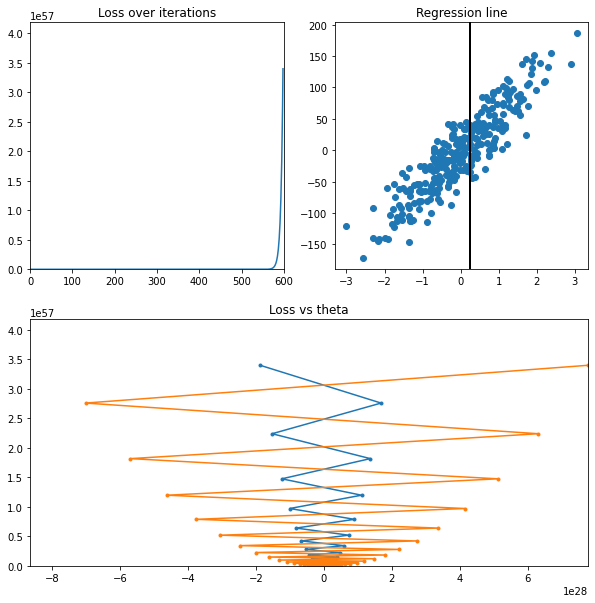

In [21]:
X = X1
y = y1.reshape(-1,1)
iterations = 600
learning_rate = 1.99

theta, theta_history, cost_history = linear_regression_bgd(
    X, y, verbose=True, theta_precision = 0.001, alpha = learning_rate ,iterations = iterations)

y_pred = predict(theta,X)
anim = regression_2Danimation(X,cost_history,theta_history)
display.HTML(anim.to_html5_video())

- learning rate is high based on the data, and θ didn't converge and loss increased

#### learning rate = 0.01

random initial θ value : [[0.00077395 0.00049223]]


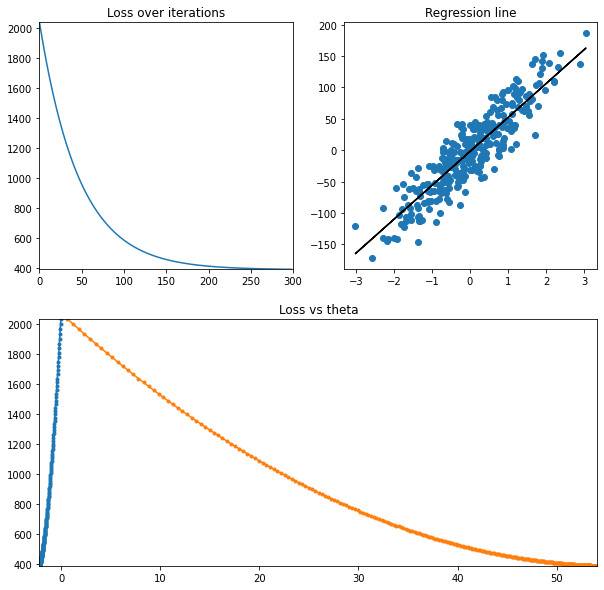

In [22]:
X = X1
y = y1.reshape(-1,1)
iterations = 300
learning_rate = 0.01

theta, theta_history, cost_history = linear_regression_bgd(
    X, y, verbose=True, theta_precision = 0.001, alpha = learning_rate ,iterations = iterations)

y_pred = predict(theta,X)
anim = regression_2Danimation(X,cost_history,theta_history)
display.HTML(anim.to_html5_video())

## Stochastic Gradient Descent

Stochastic gradient descent (often abbreviated SGD) is an iterative method for optimizing an objective function with suitable smoothness properties (e.g. differentiable or subdifferentiable). It can be regarded as a stochastic approximation of gradient descent optimization, since it replaces the actual gradient (calculated from the entire data set) by an estimate thereof (calculated from a randomly selected subset of the data). Especially in high-dimensional optimization problems this reduces the computational burden, achieving faster iterations in trade for a lower convergence rate.

- iterative method
- train over random samples of a batch size instead of training on whole dataset 
- faster convergence on large dataset
- see implementation in modelling class.

In [23]:
        
def linear_regression_sgd(X, y, verbose=True, theta_precision = 0.001, batch_size=30, alpha = 0.01 ,iterations = 10000):
    X = add_axis_for_bias(X)
    
    # number of features+1 because of theta_0
    n = X.shape[1]
    m = y.shape[0]

    theta_history = []
    cost_history = []

    theta = np.random.rand(1,n) * theta_precision
    if verbose: print("random initial θ value :",theta)
    
    for iteration in range(iterations):

        # creating indices for batches
        indices = np.random.randint(0,m,size=batch_size)

        # creating batch for this iteration
        X_batch = np.take(X,indices,axis=0)
        y_batch = np.take(y,indices,axis=0)

        # calculate y_pred 
        y_pred = predict(theta,X_batch)
        # new θ to replace old θ
        new_theta = None

        # simultaneous operation 
        gradient = derivative(X_batch,y_batch,y_pred)
        new_theta = theta - (alpha *  gradient)

        if np.isnan(np.sum(new_theta)) or np.isinf(np.sum(new_theta)):
            print("breaking. found inf or nan.")
            break
        # override with new θ 
        theta = new_theta

        # calculate cost to put in history
        cost = calculate_cost(y_pred = predict(theta,X_batch), y = y_batch)
        cost_history.append(cost)

        # calcualted theta in history
        theta_history.append(theta[0])
    return theta, np.array(theta_history), np.array(cost_history)

#### learning rate = 1.99

In [24]:
X = X1
y = y1.reshape(-1,1)

random initial θ value : [[0.00027195 0.00035269]]


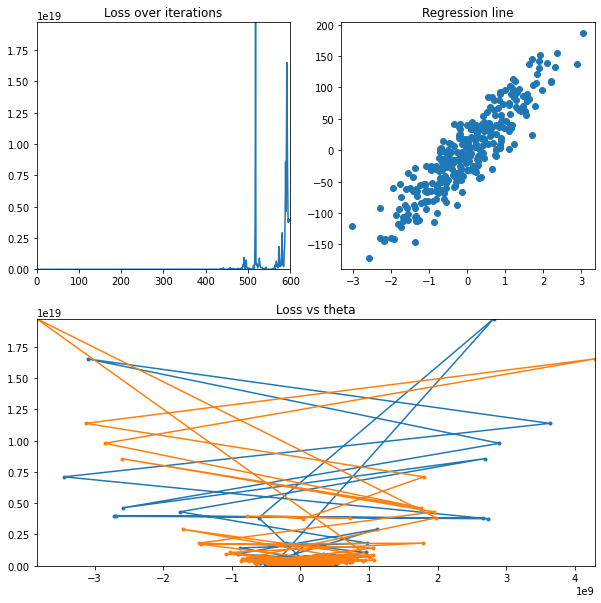

In [25]:
iterations = 600
learning_rate = 1.99

theta, theta_history, cost_history = linear_regression_sgd(
    X, y, verbose=True, theta_precision = 0.001, alpha = learning_rate ,iterations = iterations)

y_pred = predict(theta,X)
anim = regression_2Danimation(X,cost_history,theta_history)
display.HTML(anim.to_html5_video())

- learning rate is high based on the data, and θ didn't converge and loss increased

#### learning rate = 0.01

random initial θ value : [[0.00025918 0.00021308]]


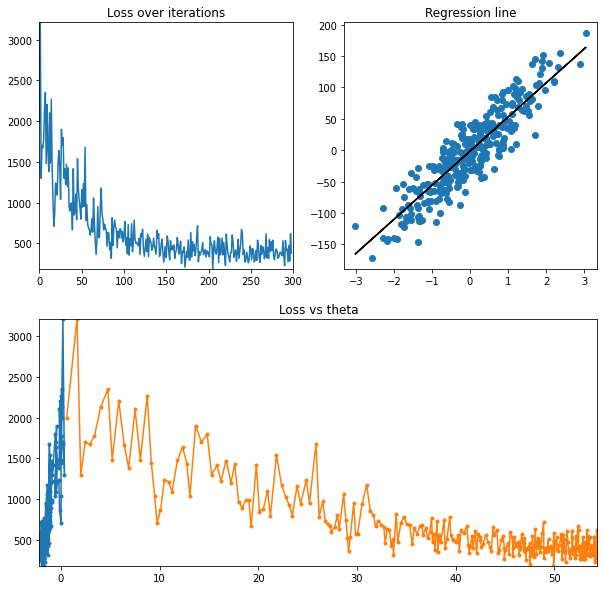

In [26]:
iterations = 300
learning_rate = 0.01

theta, theta_history, cost_history = linear_regression_sgd(
    X, y, verbose=True, theta_precision = 0.001, alpha = learning_rate ,iterations = iterations)

y_pred = predict(theta,X)
anim = regression_2Danimation(X,cost_history,theta_history)
display.HTML(anim.to_html5_video())

## Normal Equation


`normal equation vs gradient descent`

| Gradient Descent | Normal Equation | 
| - | - | 
| Need to choose learning rate alpha | no need to choose alpha |
| needs iteration | doesn't need iterations |
| large features workds well ( n large ) | computation increases for large n |
| feature scaling will help in convergence | no need to do feature scaling |


$\theta = (X^T  X)^{-1}  X^T  y$


In [27]:
def linear_regression_normaleq(X, y):
    X = add_axis_for_bias(X)
    theta = np.linalg.inv(X.T @ X) @ X.T @ y
    return theta

In [28]:
X = X1
y = y1.reshape(-1,1)

theta = linear_regression_normaleq(X,y)

y_pred = predict(theta,X)

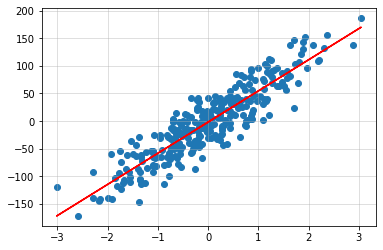

In [29]:
fig,ax = plt.subplots(1,1)
ax.scatter(X,y)
ax.plot(X,y_pred,c='r')
ax.grid(alpha=0.5)
plt.show()

## Biased data

In [56]:
X,y = make_regression(n_samples=300,n_features=1,noise=50,bias=100)

y = y.reshape(-1,1)

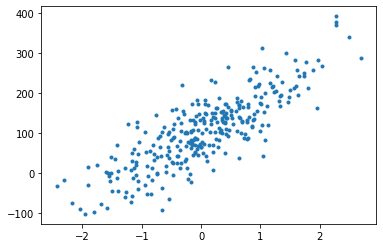

In [57]:
plt.plot(X,y,'.')

### BGD with biased data

random initial θ value : [[0.00042324 0.00017955]]


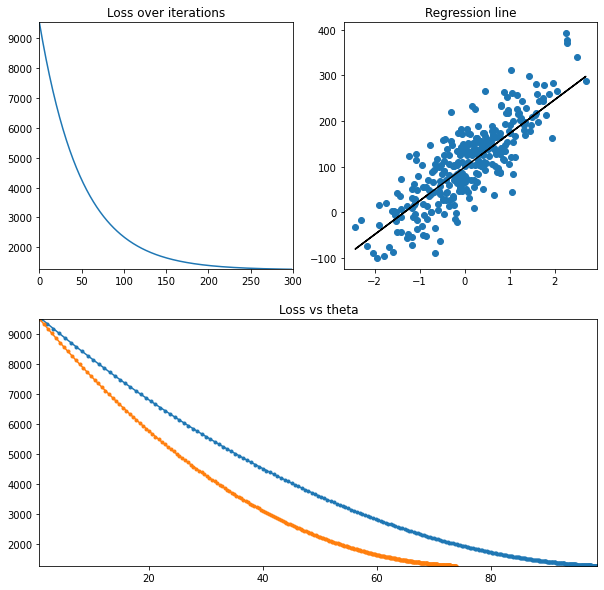

In [60]:
iterations = 300
learning_rate = 0.01

theta, theta_history, cost_history = linear_regression_bgd(
    X, y, verbose=True, theta_precision = 0.001, alpha = learning_rate ,iterations = iterations)

y_pred1 = predict(theta,X)
anim = regression_2Danimation(X,cost_history,theta_history)
display.HTML(anim.to_html5_video())

### SGD with biased data

random initial θ value : [[0.00090007 0.00079707]]


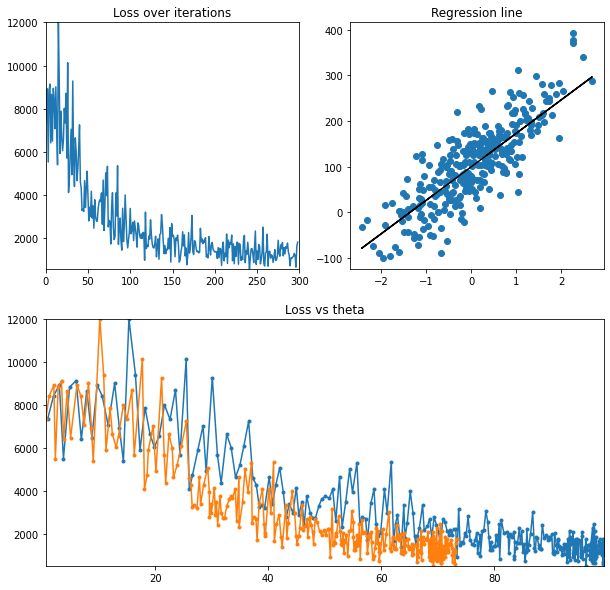

In [83]:
iterations = 300
learning_rate = 0.01

theta, theta_history, cost_history = linear_regression_sgd(
    X, y, verbose=True, theta_precision = 0.001, alpha = learning_rate ,iterations = iterations)

y_pred3 = predict(theta,X)
anim = regression_2Danimation(X,cost_history,theta_history)
display.HTML(anim.to_html5_video())

# Ridge(L2 Regularization) Regression

- Regularization
    - keep all features, but reduce magnitude/ values of paramter θ_j
    - Workes well when we have a lot of features, each of which contributes a bit to predicting y.
 

\begin{align}
    J(\theta) &= \frac{1}{2m}[{\sum_{i=1}^{m}(h_{\theta}(x^{(i)}) - y^{(i)})^2 + \lambda \sum_{j=1}^{n}{\theta_j^2}}] \\
    \frac{\partial{J(\theta)}}{\partial{\theta}} &=  \frac{1}{m}{\sum_{i=1}^{m}{(h_\theta(x^{(i)}) - y^{(i)})}}.{x_j^{(i)}} - \frac{\lambda}{m}{\theta_j}
\end{align}

Ridge regression is very similar to least squares, except that the coefficients are estimated by minimizing a slightly different quantity.


**Algorithm**

\begin{align}
    \text{repeat until convergence \{}\\
    \theta_0 &:= \theta_0 - \alpha \frac{1}{m}{\sum_{i=1}^{m}{(h_\theta(x^{(i)}) - y^{(i)})}}.x_0^{(i)}\\
    \theta_j &:= \theta_j - \alpha [ \frac{1}{m}{\sum_{i=1}^{m}{(h_\theta(x^{(i)}) - y^{(i)})}}.{x_j^{(i)}} - \frac{\lambda}{m}{\theta_j} ]\\
    \text{\} j = 1,2,3,...,n}
\end{align} 

- here $\theta_0$ will not be effected by penalty but rest of the theta's $\theta_1 ... \theta_n$ will be effected by it.

### BGD

In [30]:
def ridge_regression_bgd(X, y, verbose=True, theta_precision = 0.001, alpha = 0.01 ,iterations = 10000, penalty=1.0):
    X = add_axis_for_bias(X)
    
    # number of features+1 because of theta_0
    n = X.shape[1]
    m = y.shape[0]

    theta_history = []
    cost_history = []

    theta = np.random.rand(1,n) * theta_precision
    if verbose: print("random initial θ value :",theta)

    for iteration in range(iterations):
        # calculate y_pred 
        y_pred = predict(theta,X)

        # new θ to replace old θ
        new_theta = None
        
        # simultaneous operation 
        gradient = derivative(X,y,y_pred)
        new_theta_0 = theta[:,[0]] - (alpha * gradient[0])
        new_theta_rest = (theta[:,range(1,n)] * (1 - (penalty/m)) ) - (alpha * gradient[1:])

        new_theta = np.hstack((new_theta_0,new_theta_rest))

        # simultaneous operation 
        gradient = derivative(X,y,y_pred)
        new_theta = theta - (alpha *  gradient)

        if np.isnan(np.sum(new_theta)) or np.isinf(np.sum(new_theta)):
            print("breaking. found inf or nan.")
            break
        # override with new θ 
        theta = new_theta

        # calculate cost to put in history
        cost = calculate_cost(y_pred = predict(theta,X), y = y)
        cost_history.append(cost)

        # calcualted theta in history
        theta_history.append(theta[0])
        
    return theta, np.array(theta_history), np.array(cost_history)

random initial θ value : [[0.00025955 0.00017753]]


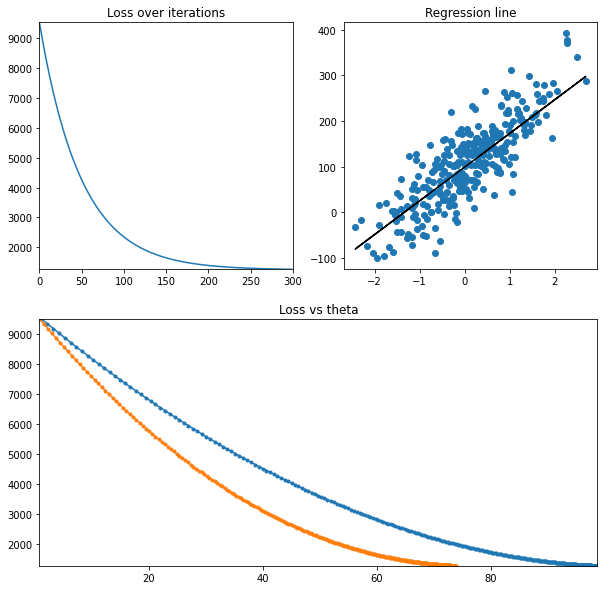

In [81]:
iterations = 300
learning_rate = 0.01
penalty = 1.0
theta1, theta_history, cost_history = ridge_regression_bgd(
    X, y, verbose=True, theta_precision = 0.001, alpha = learning_rate ,iterations = iterations, penalty=penalty)

y_pred2 = predict(theta,X)
anim = regression_2Danimation(X,cost_history,theta_history)
display.HTML(anim.to_html5_video())

### SGD

In [82]:
        
def ridge_regression_sgd(
    X, 
    y, 
    verbose=True,
    theta_precision = 0.001, 
    batch_size=30, 
    alpha = 0.01,
    iterations = 10000, 
    penalty=1.0):
    X = add_axis_for_bias(X)
    
    # number of features+1 because of theta_0
    n = X.shape[1]
    m = y.shape[0]

    theta_history = []
    cost_history = []

    theta = np.random.rand(1,n) * theta_precision
    if verbose: print("random initial θ value :",theta)
    
    for iteration in range(iterations):

        # creating indices for batches
        indices = np.random.randint(0,m,size=batch_size)

        # creating batch for this iteration
        X_batch = np.take(X,indices,axis=0)
        y_batch = np.take(y,indices,axis=0)

        # calculate y_pred 
        y_pred = predict(theta,X_batch)
        # new θ to replace old θ
        new_theta = None

        # simultaneous operation 
        gradient = derivative(X_batch,y_batch,y_pred)
        new_theta_0 = theta[:,[0]] - (alpha * gradient[0])
        new_theta_rest = theta[:,range(1,n)] * (1 - (penalty/m) ) - (alpha * gradient[1:])

        new_theta = np.hstack((new_theta_0,new_theta_rest)) 
        if np.isnan(np.sum(new_theta)) or np.isinf(np.sum(new_theta)):
            print("breaking. found inf or nan.")
            break
        # override with new θ 
        theta = new_theta

        # calculate cost to put in history
        cost = calculate_cost(y_pred = predict(theta,X_batch), y = y_batch)
        cost_history.append(cost)

        # calcualted theta in history
        theta_history.append(theta[0])
    return theta, np.array(theta_history), np.array(cost_history)

random initial θ value : [[0.00082611 0.00094745]]


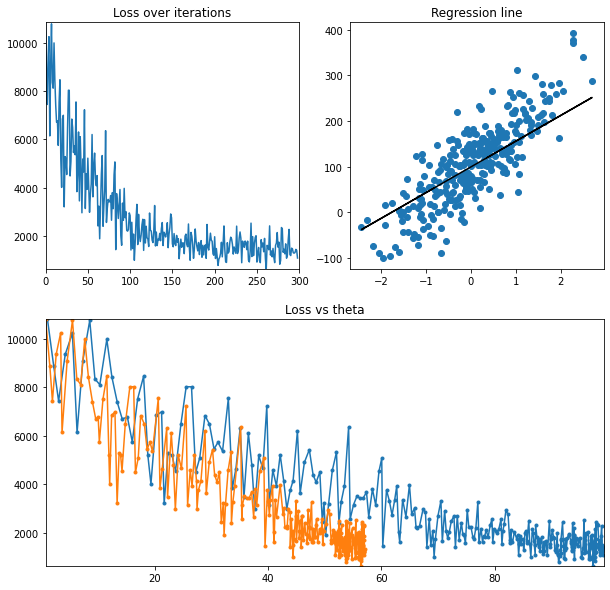

In [84]:
iterations = 300
learning_rate = 0.01
penalty = 1.0
theta1, theta_history, cost_history = ridge_regression_sgd(
    X, y, verbose=True, theta_precision = 0.001, alpha = learning_rate ,iterations = iterations, penalty=penalty)

y_pred4 = predict(theta,X)
anim = regression_2Danimation(X,cost_history,theta_history)
display.HTML(anim.to_html5_video())

### Normal Equation

$θ = (X^T X + \lambda I)^{-1}  X^T  y$

In [89]:
def ridge_regression_normaleq(X, y, penalty=1.0):
    X = add_axis_for_bias(X)
    m,n = X.shape
    theta = np.linalg.inv(X.T @ X + (penalty * np.identity(n))) @ X.T @ y
    return theta

In [90]:

penalty = 1.0
theta = ridge_regression_normaleq(X, y, penalty=penalty)

In [91]:
theta.shape

(2, 1)

In [92]:
y_pred5 = predict(theta,X)
y_pred5.shape

(300, 1)

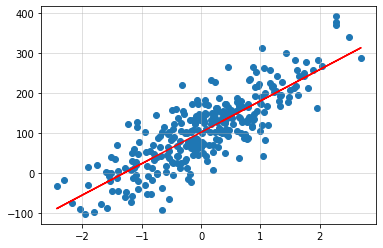

In [94]:
fig,ax = plt.subplots(1,1)
ax.scatter(X,y)
ax.plot(X,y_pred5,c='r')
ax.grid(alpha=0.5)
plt.show()

# Lasso(L1 Regularization) Regression

`Work In Progress`

\begin{align}
    J(\theta) &= \frac{1}{2m}[{\sum_{i=1}^{m}(h_{\theta}(x^{(i)}) - y^{(i)})^2 + \lambda \sum_{j=1}^{n}{\theta_j}}] \\
    \frac{\partial{J(\theta)}}{\partial{\theta}} &= \frac{1}{m}{\sum_{i=1}^{m}{(h_\theta(x^{(i)}) - y^{(i)})}}.{x^{(i)}} - \frac{\lambda}{2m}
\end{align}

**Algorithm**

\begin{align}
    \text{repeat until convergence \{}\\
    \theta_0 &:= \theta_0 - \alpha \frac{1}{m}{\sum_{i=1}^{m}{(h_\theta(x^{(i)}) - y^{(i)})}}.x_0^{(i)}\\
    \theta_j &:= \theta_j - \alpha [ \frac{1}{m}{\sum_{i=1}^{m}{(h_\theta(x^{(i)}) - y^{(i)})}}.{x_j^{(i)}} - \frac{\lambda}{2m} ]\\
    \text{\} j = 1,2,3,...,n}
\end{align} 

### BGD

In [96]:
def lasso_regression_bgd(X, y, verbose=True, theta_precision = 0.001, alpha = 0.01 ,iterations = 10000, penalty=1.0):
    X = add_axis_for_bias(X)
    
    # number of features+1 because of theta_0
    n = X.shape[1]
    m = y.shape[0]

    theta_history = []
    cost_history = []

    theta = np.random.rand(1,n) * theta_precision
    if verbose: print("random initial θ value :",theta)

    for iteration in range(iterations):
        # calculate y_pred 
        y_pred = predict(theta,X)

        # new θ to replace old θ
        new_theta = None
        
        
        # simultaneous operation     
        gradient = derivative(X,y,y_pred)
        new_theta_0 = theta[:,[0]] - (alpha * gradient[0])
        new_theta_rest = theta[:,range(1,n)] - (alpha * gradient[1:]) - (penalty/2 * m)

        new_theta = np.hstack((new_theta_0,new_theta_rest))

        # simultaneous operation 
        gradient = derivative(X,y,y_pred)
        new_theta = theta - (alpha *  gradient)

        if np.isnan(np.sum(new_theta)) or np.isinf(np.sum(new_theta)):
            print("breaking. found inf or nan.")
            break
        # override with new θ 
        theta = new_theta

        # calculate cost to put in history
        cost = calculate_cost(y_pred = predict(theta,X), y = y)
        cost_history.append(cost)

        # calcualted theta in history
        theta_history.append(theta[0])
        
    return theta, np.array(theta_history), np.array(cost_history)

random initial θ value : [[0.00019529 0.00010178]]


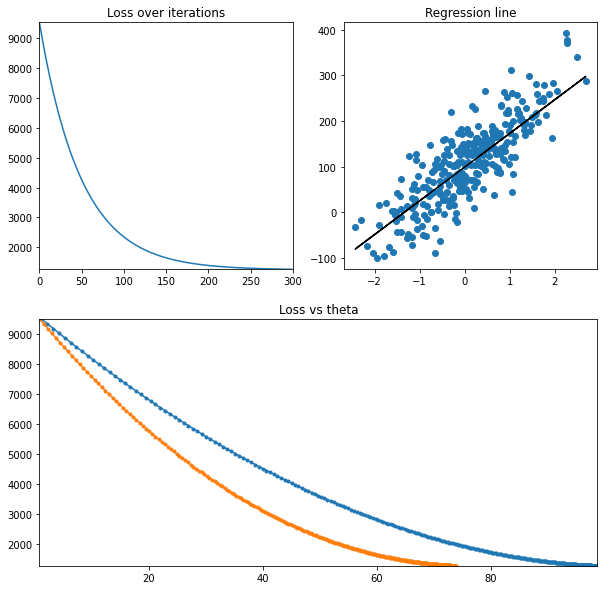

In [102]:
iterations = 300
learning_rate = 0.01
penalty = 1.0
theta1, theta_history, cost_history = lasso_regression_bgd(
    X, y, verbose=True, theta_precision = 0.001, alpha = learning_rate ,iterations = iterations, penalty=penalty)

y_pred2 = predict(theta,X)
anim = regression_2Danimation(X,cost_history,theta_history)
display.HTML(anim.to_html5_video())

### SGD

In [98]:
        
def lasso_regression_sgd(
    X, 
    y, 
    verbose=True,
    theta_precision = 0.001, 
    batch_size=30, 
    alpha = 0.01,
    iterations = 10000, 
    penalty=1.0):
    X = add_axis_for_bias(X)
    
    # number of features+1 because of theta_0
    n = X.shape[1]
    m = y.shape[0]

    theta_history = []
    cost_history = []

    theta = np.random.rand(1,n) * theta_precision
    if verbose: print("random initial θ value :",theta)
    
    for iteration in range(iterations):

        # creating indices for batches
        indices = np.random.randint(0,m,size=batch_size)

        # creating batch for this iteration
        X_batch = np.take(X,indices,axis=0)
        y_batch = np.take(y,indices,axis=0)

        # calculate y_pred 
        y_pred = predict(theta,X_batch)
        # new θ to replace old θ
        new_theta = None

        # simultaneous operation 
        gradient = derivative(X_batch,y_batch,y_pred)
        new_theta_0 = theta[:,[0]] - (alpha * gradient[0])
        new_theta_rest = theta[:,range(1,n)] - (alpha * gradient[1:]) - (penalty/2 * m)

        new_theta = np.hstack((new_theta_0,new_theta_rest)) 
        if np.isnan(np.sum(new_theta)) or np.isinf(np.sum(new_theta)):
            print("breaking. found inf or nan.")
            break
        # override with new θ 
        theta = new_theta

        # calculate cost to put in history
        cost = calculate_cost(y_pred = predict(theta,X_batch), y = y_batch)
        cost_history.append(cost)

        # calcualted theta in history
        theta_history.append(theta[0])
    return theta, np.array(theta_history), np.array(cost_history)

In [ ]:
iterations = 300
learning_rate = 0.001
penalty = 1.0
theta1, theta_history, cost_history = lasso_regression_sgd(
    X, y, verbose=True, theta_precision = 0.001, alpha = learning_rate ,iterations = iterations, penalty=penalty)

y_pred2 = predict(theta,X)
anim = regression_2Danimation(X,cost_history,theta_history)
display.HTML(anim.to_html5_video())

random initial θ value : [[0.00051558 0.0003743 ]]
